# Background Project
Asuransi kesehatan adalah salah satu hal yang patut diperhatikan karena bersangkutan dengan
kebutuhan perencanaan masa depan. Pengguna asuransi kesehatan diwajibkan untuk
membayar besaran uang secara rutin (premi) kepada pihak perusahaan asuransi. Premi
tersebut diolah oleh perusahaan asuransi untuk membayarkan tagihan kesehatan pengguna
yang tertanggung. Penentuan nilai premi menjadi tantangan tersendiri bagi pihak asuransi
mengingat ada banyak faktor yang dapat mempengaruhi & meningkatkan profil resiko
pengguna.
Melalui project ini, Anda akan diminta untuk membantu menganalisa variable-variabel yang
memiliki hubungan dengan tagihan kesehatan yang diterima oleh setiap pengguna. Anda akan
diberikan data yang berisi data personal pengguna seperti umur, gender, tempat tinggal
pengguna, banyak anak tertanggung asuransi, nilai bmi, keadaan merokok atau tidaknya
pengguna.

# Import library and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Import and check data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
PATH = '/content/drive/MyDrive/insurance.csv'

In [70]:
data = pd.read_csv(PATH)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Analisa
Dengan menggunakan dasar ilmu probability, Anda diharapkan dapat melakukan analisa secara
saintifik untuk mencari variabel-variabel pengguna yang berhubungan dengan tagihan
kesehatan.
Untuk mempermudah dan memperdalam analisa, berikut adalah hal-hal komprehensif yang
dapat Anda lakukan.

## Analisa Descriptive Statistic

Kita awali proses analisa ini dengan hal yang paling dasar, yakni merangkum karakter-karakter
berdasarkan data seperti mencari rata-rata & persebaran data. Anda bisa memilih 5 pertanyaan
dibawah ini untuk melakukan eksplorasi data. Beberapa hal yang dapat Anda jawab adalah
1. Rata-rata umur pengguna
2. Rata-rata nilai BMI dari pengguna yang merokok
3. Berapa rata rata umur pada data tersebut?
4. Berapa rata rata nilai BMI dari yang merokok?
5. Apakah variansi dari data charges perokok dan non perokok sama?
6. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
7. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
8. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25
atau non perokok yang BMI nya diatas 25
9. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?
10. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [6]:
#Rata-rata umur pengguna
avg_usr_age = data['age'].mean()
avg_usr_age

39.20702541106129

In [80]:
data['bmi'].mean()

30.66339686098655

In [7]:
#Rata-rata nilai BMI dari pengguna yang merokok
bmi_smoker = data[data['smoker'] == 'yes']['bmi'].mean()
bmi_smoker

30.70844890510949

In [8]:
#rata rata umur perempuan dan laki-laki yang merokok
age_smoker = data[data['smoker'] == 'yes'].groupby('sex')['age'].agg([np.mean])
age_smoker

,mean
sex,
female,38.608696
male,38.446541


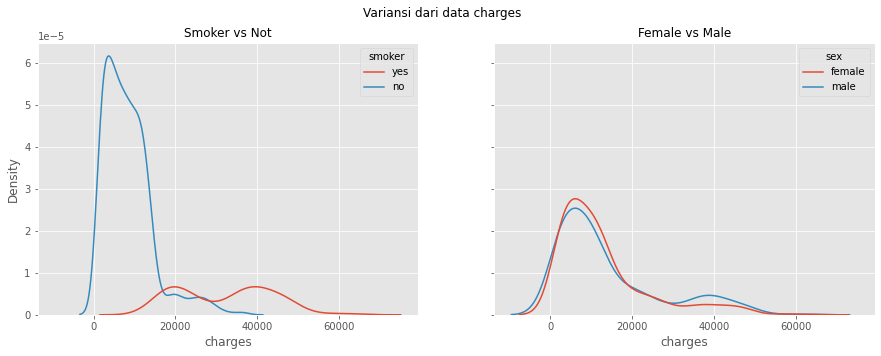

In [9]:
#variansi dari data charges perokok dan non perokok
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Variansi dari data charges')


sns.kdeplot(data=data, x="charges", color="skyblue", ax = axes[0], hue='smoker')
axes[0].set_title( "Smoker vs Not" , size = 12 )

sns.kdeplot(data=data, x="charges", color="skyblue", ax = axes[1], hue='sex')
axes[1].set_title( "Female vs Male" , size = 12 )


plt.show()

In [10]:
bmi_usr = data.groupby(["smoker",'sex'])[['bmi','age','charges']].agg([np.mean])
bmi_usr

bmi        age       charges
                    mean       mean          mean
smoker sex                                       
no     female  30.539525  39.691042   8762.297300
       male    30.770580  39.061896   8087.204731
yes    female  29.608261  38.608696  30678.996276
       male    31.504182  38.446541  33042.005975

In [11]:
#rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25
bmi_over_25 = data[data['bmi'] > 25].groupby(["smoker"])[['charges']].agg([np.mean])
bmi_over_25

,charges
,mean
smoker,
no,8629.589610
yes,35116.909657


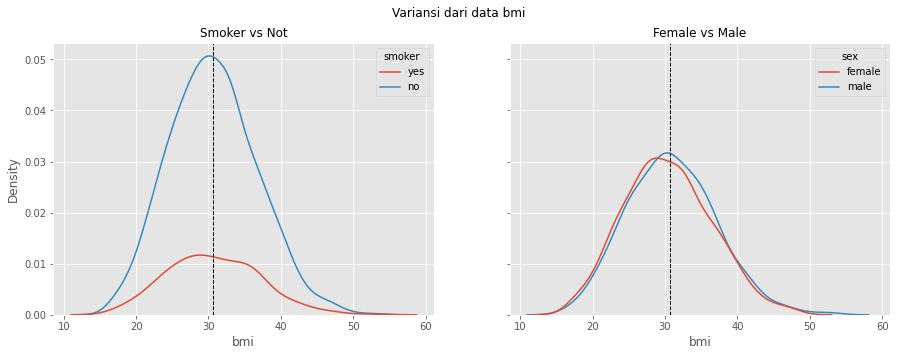

In [63]:
#variansi dari data charges perokok dan non perokok
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Variansi dari data bmi')


sns.kdeplot(data=data, x="bmi", color="skyblue", ax = axes[0], hue='smoker')
axes[0].set_title( "Smoker vs Not" , size = 12 )
axes[0].axvline(data['bmi'].mean(), color='k', linestyle='dashed', linewidth=1)


sns.kdeplot(data=data, x="bmi", color="skyblue", ax = axes[1], hue='sex')
axes[1].set_title( "Female vs Male" , size = 12 )
axes[1].axvline(data['bmi'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.show()

## Analisa Variabel Kategorik (PMF)

Selanjutnya, untuk memperdalam analisa, Anda dapat mengidentifikasi peluang kondisi tertentu
yang berpotensi memiliki besaran tagihan kesehatan tertentu. Anda bisa memilih 5 pertanyaan
dibawah ini untuk pengecekan kondisi pada data. Beberapa hal yang dapat Anda jawab adalah
1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi tagihan dari tiap-tiap region?

Materi pertemuan : 1 - 8

In [13]:
data.groupby(['sex','smoker']).count()['age']

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: age, dtype: int64

In [14]:
#Gender mana yang memiliki tagihan paling tinggi?
data.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [15]:
#Distribusi peluang tagihan di tiap-tiap region
data['prob_charges'] = data['charges'] / data['charges'].sum()
region_anal = data.groupby('region').sum()
region_anal

,age,bmi,children,charges,prob_charges
region,,,,,
northeast,12723,9452.215,339,4.343669e+06,0.244633
northwest,12739,9489.930,373,4.035712e+06,0.227289
southeast,14174,12141.580,382,5.363690e+06,0.302081
southwest,12823,9943.900,371,4.012755e+06,0.225997


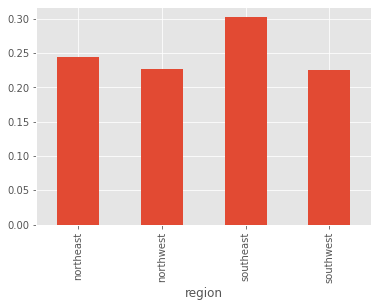

In [16]:
region_anal['prob_charges'].plot(kind='bar')

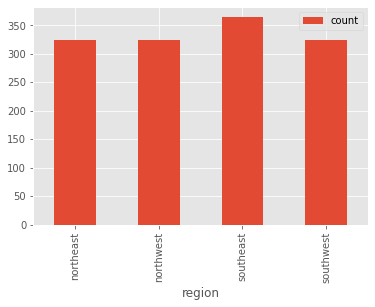

In [17]:
#Apakah setiap region memiliki proporsi data banyak orang yang sama?
data.groupby(['region'])['charges'].agg(['count']).plot(kind='bar')

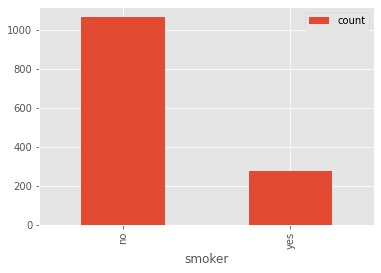

In [18]:
#Mana yang lebih tinggi proporsi perokok atau non perokok?
data.groupby(['smoker'])['charges'].agg(['count']).plot(kind='bar')

Text(0.5, 1.0, 'Distribusi tagihan dari tiap-tiap region')

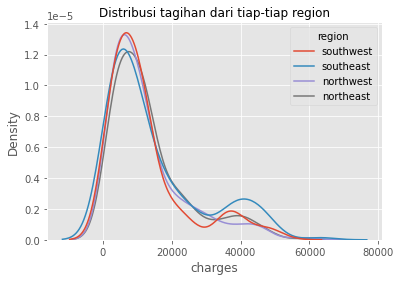

In [19]:
sns.kdeplot(data=data, x="charges", color="skyblue", hue='region').set_title( "Distribusi tagihan dari tiap-tiap region" , size = 12 )


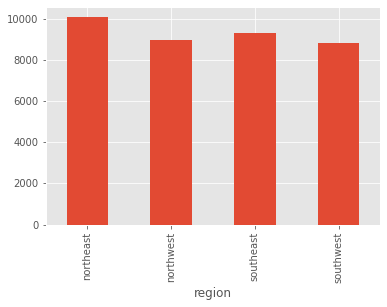

In [64]:
#proporsi data banyak orang setiap region
count_usr_region = data.groupby(["region"]).median()
count_usr_region['charges'].plot(kind='bar')

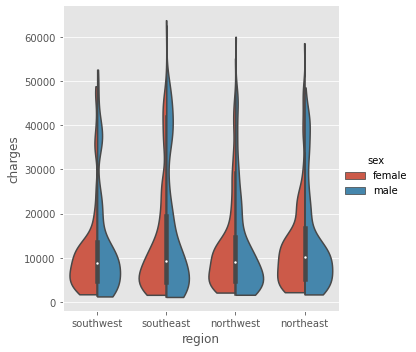

In [21]:
sns.catplot(
    data=data, x="region", y="charges", hue="sex",
    kind="violin", bw=.25, cut=0, split=True,
)

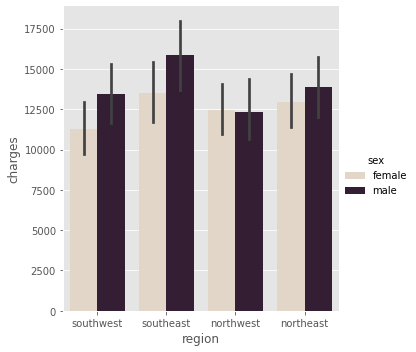

In [22]:
#variansi dari data charges perokok dan non perokok
sns.catplot(data=data, x="region", y='charges', kind='bar', palette="ch:.25", hue='sex')
plt.show()

## Analisa Variabel Kontinu (CDF)

Variabel dalam data yang kita punya tidak semuanya berbentuk kategorik, untuk memahami
kemungkinan kondisi variabel bernilai kontinu terhadap tagihan kesehatan, kita bisa melakukan
analisa CDF pada data. Beberapa hal yang dapat Anda jawab adalah
1. Mencari peluang besar tagihan berdasarkan BMI
2. Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan
tagihan kesehatan di atas 16.700.
3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah
perokok
4. Mana yang lebih mungkin terjadi
a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
atau
b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 7k

5. Mana yang lebih mungkin terjadi
a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k, atau
b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k

Materi pertemuan : 9 - 12

In [23]:
#peluang besar tagihan berdasarkan BMI
data_smoker = data[data["smoker"] == 'yes']
smoker_25up_bmi = data_smoker[data_smoker['bmi'] > 25]
smoker_25up_bmi

,age,sex,bmi,children,smoker,region,charges,prob_charges
0,19,female,27.900,0,yes,southwest,16884.92400,0.000951
11,62,female,26.290,0,yes,southeast,27808.72510,0.001566
14,27,male,42.130,0,yes,southeast,39611.75770,0.002231
19,30,male,35.300,0,yes,southwest,36837.46700,0.002075
23,34,female,31.920,1,yes,northeast,37701.87680,0.002123
...,...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300,0.001909
1313,19,female,34.700,2,yes,southwest,36397.57600,0.002050
1321,62,male,26.695,0,yes,northeast,28101.33305,0.001583
1323,42,female,40.370,2,yes,southeast,43896.37630,0.002472


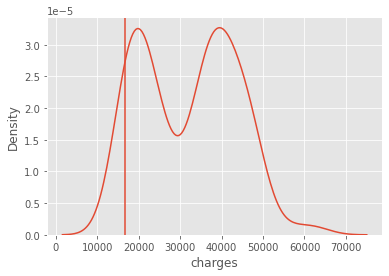

In [24]:
#Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok
sns.kdeplot(data=data_smoker, x="charges")
plt.axvline(x=16700)

In [56]:
#Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok
data_smoker[data_smoker['charges'] > 16700].count()['age']/len(data_smoker)

0.927007299270073

In [55]:
smoker_25up_bmi[smoker_25up_bmi['charges'] < 16700].count()['age']/len(smoker_25up_bmi)

0.0182648401826484

In [54]:
#peluang seorang perokok dengan BMI > 25 mendapatkan tagihan diatas 16.700
smoker_25up_bmi[smoker_25up_bmi['charges'] > 16700].count()['age']/len(smoker_25up_bmi)

0.9817351598173516

In [57]:
charges_up_16k = data[data['charges'] >= 16700]
charges_up_16k

,age,sex,bmi,children,smoker,region,charges,prob_charges
0,19,female,27.900,0,yes,southwest,16884.92400,0.000951
3,33,male,22.705,0,no,northwest,21984.47061,0.001238
9,60,female,25.840,0,no,northwest,28923.13692,0.001629
11,62,female,26.290,0,yes,southeast,27808.72510,0.001566
14,27,male,42.130,0,yes,southeast,39611.75770,0.002231
...,...,...,...,...,...,...,...,...
1318,35,male,39.710,4,no,northeast,19496.71917,0.001098
1321,62,male,26.695,0,yes,northeast,28101.33305,0.001583
1323,42,female,40.370,2,yes,southeast,43896.37630,0.002472
1328,23,female,24.225,2,no,northeast,22395.74424,0.001261


In [59]:
charges_up_16k[charges_up_16k['bmi'] > 25].count()['age']/len(charges_up_16k)

0.8473053892215568

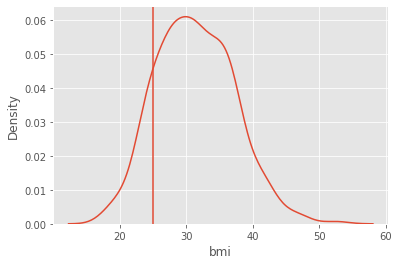

In [58]:
sns.kdeplot(data=charges_up_16k, x="bmi")
plt.axvline(x=25)

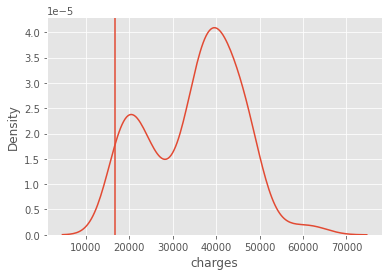

In [28]:
sns.kdeplot(data=smoker_25up_bmi, x="charges")
plt.axvline(x=16700)

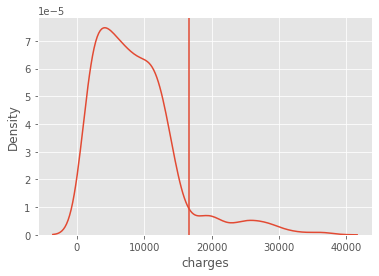

In [29]:
non_smoker = data[data["smoker"] == 'no']
non_smoker_25up_bmi = non_smoker[non_smoker['bmi'] > 25]
sns.kdeplot(data=non_smoker_25up_bmi, x="charges")
plt.axvline(x=16700)

In [65]:
non_smoker_25up_bmi[non_smoker_25up_bmi['charges'] > 16700].count()['age']/len(non_smoker_25up_bmi)

0.0779816513761468

In [53]:
#mana yang lebih mungkin terjadi
# 1. seseorang dengan BMI > 25 mendapatkan tagihan diatas 16.7k atau
# 2. seseorang dengan BMI < 25 mendapatkan tagihan kesehatan daitas 16.7k
bmi_up25 = data[data['bmi'] >= 25]
bmi_up25[bmi_up25['charges'] > 16700].count()['age']/len(bmi_up25)

0.25892040256175664

In [52]:
bmi_below25 = data[data['bmi'] < 25]
bmi_below25[bmi_below25['charges'] > 16700].count()['age']/len(bmi_below25)

0.20816326530612245

In [50]:
#mana yang lebih mungkin terjadi
# 1. seseorang perokok dengan BMI > 25 mendaoatkan tagihan kesehatan diatas 16.7k atau
# 2. seseorang non perokok dengan BMI > 25 mendapatkan tagihan kesehatan diatas 16.7k
smoker_25up_bmi[smoker_25up_bmi['charges'] > 16700].count()['age']/len(smoker_25up_bmi)



0.9817351598173516

In [51]:
non_smoker_25up_bmi = non_smoker[non_smoker['bmi'] > 25]
non_smoker_25up_bmi[non_smoker_25up_bmi['charges'] > 16700].count()['age']/len(non_smoker_25up_bmi)

0.0779816513761468

## Analisa Korelasi Variabel
Setelah menjawab kondisi-kondisi yang lebih mungkin memiliki tagihan kesehatan yang tinggi
dari langkah sebelumnya. Kita juga dapat mencari keterhubungan antara kondisi-kondisi
tersebut dengan tagihan kesehatan. Analisa korelasi akan diperlukan disini.

###SMOKER

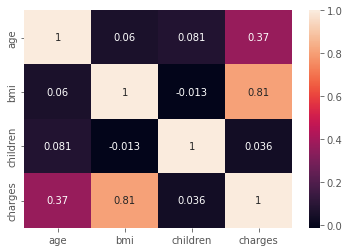

In [72]:
corr_matrix = data[data['smoker'] == 'yes'].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

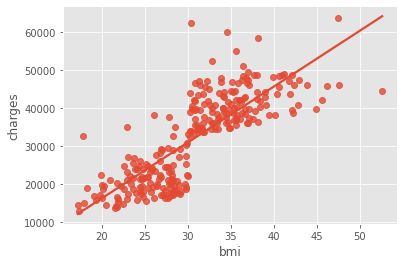

In [75]:
sns.regplot(x = "bmi",
            y = "charges", 
            ci = None,
            data = data[data['smoker'] == 'yes'])

###NON SMOKER

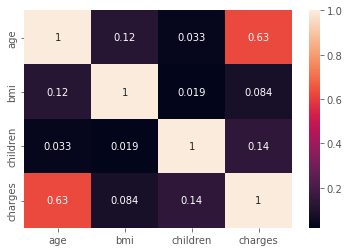

In [77]:
corr_matrix = data[data['smoker'] == 'no'].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

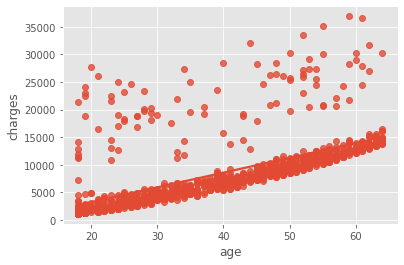

In [79]:
sns.regplot(x = "age",
            y = "charges", 
            ci = None,
            data = data[data['smoker'] == 'no'])

## Pengujian Hipotesis

Langkah terakhir, kita cari apakah ada bukti statistik yang cukup terhadap klaim atau hipotesis
tentang tagihan kesehatan. Anda wajib mengecek 3 hipotesis tentang karakter populasi dari
data. Hipotesis yang wajib uji adalah
1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan
dengan BMI dibawah 25
Satu hipotesis lain, anda bisa pilih salah satu hipotesis dibawah ini, atau anda dapat membuat
hipotesis lainnya
1. BMI laki-laki dan perempuan sama
2. Tagihan kesehatan laki-laki lebih besar dari perempuan
3. Proporsi perokok berbeda di tiap region

Materi pertemuan : 15 & 16

Setelah melalui 5 langkah ini, Anda akan mendapatkan bahan untuk melakukan analisa
mendalam serta dapat menjawab kondisi atau faktor dari pengguna asuransi kesehatan yang
mempengaruhi besar tagihan.